# Introduction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sb

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


# Load and Check Data

In [2]:
df= pd.read_csv("/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

All of the features are numeric except "class" and there is no null entries.

In [4]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

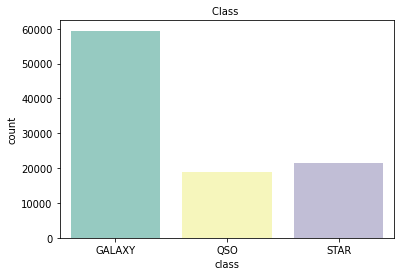

In [7]:
sb.countplot(x = df["class"], palette="Set3")
plt.title("Class ",fontsize=10)
plt.show()

In [8]:
# see both distribution of single variables and relationships between two variables
#sb.pairplot(df,hue='class',palette='Dark2')

# Preprocessing

In [9]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle = True)

# Feature Selection

**TODO:** 
* Will visualize how I found the fields to be dropped like this. https://www.kaggle.com/code/songwonmin/sdss-eng#%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B8%B0-(data-load)
* https://www.kaggle.com/code/cammahana/supervised-learning-sdss?scriptVersionId=87403347&cellId=8
* distribution plot https://www.kaggle.com/code/tunahandeniz/stellar-classification-with-ensemble-algorithms?scriptVersionId=95745032&cellId=8 
* heatmap 
https://www.kaggle.com/code/kaanergul/stellar-classification-4-model-and-ensemble#Feature-Selection 
https://www.kaggle.com/code/tharunprabhakar/stellar-classification-using-smote

**EDA**
* https://www.kaggle.com/code/naufalauliaadam/stellar-classification-dataset-sdss17#Data-Loading

In [10]:
df = df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [11]:
x = df.drop('class',axis=1)
y = df['class']

In [12]:
clf = LocalOutlierFactor()
y_loc = clf.fit_predict(x)

In [13]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score
#threshold
threshold = np.quantile(x_score , .10)                                            

In [14]:
threshold

-2.3191353459944413

In [15]:
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
len(outlier_index)

10000

# Train / Test Split

In [16]:
le=LabelEncoder()
y = le.fit_transform(y)
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

#0-GALAXY    59445
#2-STAR      21594
#1-QSO       18961

[0 1 2] [59445 18961 21594]


In [17]:
y_df=pd.DataFrame({'class':le.fit_transform(y)}) 
y_df.value_counts()

class
0        59445
2        21594
1        18961
dtype: int64

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33, random_state = 42, stratify = y, shuffle=True)
print("xtrain: {}".format(xtrain.shape))
print("xtest: {}".format(xtest.shape))
print("ytrain: {}".format(ytrain.shape))
print("ytest: {}".format(ytest.shape))

xtrain: (67000, 11)
xtest: (33000, 11)
ytrain: (67000,)
ytest: (33000,)


# Data Scaling

In [19]:
scaler = StandardScaler()
#x = scaler.fit_transform(x)
xtrain = scaler.fit_transform(xtrain)
xtest  = scaler.transform(xtest)

# Sampling With SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
print('Original ytrain dataset shape %s' % Counter(ytrain))
xtrain_smote, ytrain_smote = smote.fit_resample(xtrain, ytrain)
print('Resampled ytrain dataset shape %s' % Counter(ytrain_smote))

Original dataset shape Counter({0: 59445, 2: 21594, 1: 18961})
Original ytrain dataset shape Counter({0: 39828, 2: 14468, 1: 12704})
Resampled ytrain dataset shape Counter({1: 39828, 0: 39828, 2: 39828})


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


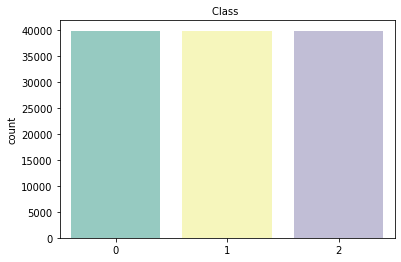

In [21]:
sb.countplot(ytrain_smote, palette='Set3')
plt.title("Class ",fontsize=10)
plt.show()

# Training

In [22]:
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC,ConfusionMatrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgboost
#from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

# Support Vector Machine (SVM)

In [23]:
%%time
#score = cross_val_score(svc, xtrain_smote, ytrain_smote, cv = kfold)
# train grid search
params = {'C': [1, 10], 'gamma': [1,0.1],'kernel': ['rbf']}
svm_grid_search = GridSearchCV(estimator = SVC(), param_grid=params, cv = kfold, n_jobs=-1, verbose=1)
start = time.time()
clf=svm_grid_search.fit(xtrain_smote, ytrain_smote)
end = time.time()

Fitting 10 folds for each of 4 candidates, totalling 40 fits
CPU times: user 8min 31s, sys: 847 ms, total: 8min 32s
Wall time: 1h 7min 30s


In [24]:
print("[INFO] grid search took {:.2f} seconds".format(end - start))
print('Best Score: %.4f' % (svm_grid_search.best_score_))
print('Best Params: %s' % (svm_grid_search.best_params_))
print('Best Estimator: ') 
grid_best = svm_grid_search.best_estimator_
print(grid_best)
#print('GridSearchCV mean_test_score: %.3f' % (svm_grid_search.cv_results_["mean_test_score"]))
print(clf)
#print('Best hyperparameters are: '+str(model_random.best_params_))
#print('Best score is: '+str(model_random.best_score_))
#print('Best Score: %s' % result.best_score_)
#print('Best Hyperparameters: %s' % result.best_params_)

[INFO] grid search took 4050.41 seconds
Best Score: 0.9737
Best Params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Estimator: 
SVC(C=10, gamma=1)
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=1)


In [25]:
ypredicted=svm_grid_search.predict(xtest)
score = clf.score(xtest, ytest)  
print(score)
svm_score = np.mean(score)
print('Test Accuracy : %.4f' % (svm_score))
print('Test SVM Accuracy : ' + " {:.2f}%".format(np.mean(score) * 100))

0.9665757575757575
Test Accuracy : 0.9666
Test SVM Accuracy :  96.66%


In [26]:
print(classification_report(ytest,ypredicted))
print("SVM model accuracy_score on test:", accuracy_score(ytest, ypredicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     19617
           1       0.94      0.93      0.94      6257
           2       0.96      1.00      0.98      7126

    accuracy                           0.97     33000
   macro avg       0.96      0.97      0.96     33000
weighted avg       0.97      0.97      0.97     33000

SVM model accuracy_score on test: 0.9665757575757575


AxesSubplot(0.125,0.125;0.62x0.755)


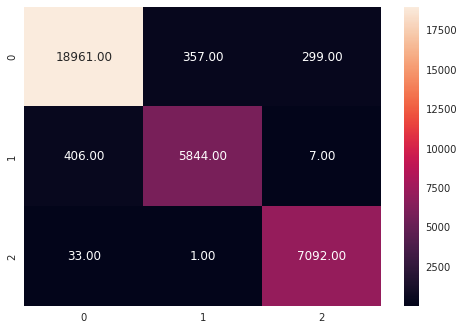

In [27]:
cm = confusion_matrix(ytest, ypredicted)
cm
print(sb.heatmap(cm,annot=True,fmt=".2f"))

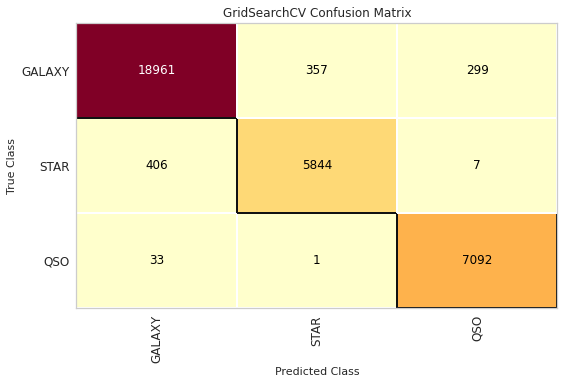

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
svm_cm = ConfusionMatrix(svm_grid_search, classes=['GALAXY','STAR','QSO'], cmap='YlOrRd')

svm_cm.fit(xtrain_smote, ytrain_smote)
svm_cm.score(xtest, ytest)
svm_cm.show()

# Random Forest Classifier (RF)

In [29]:
%%time
rfc = RandomForestClassifier(random_state = 42)
# train grid search
params = {'max_depth':[5,10], 'n_estimators':[10,100,150]}       
rfc_grid_search = GridSearchCV(estimator = rfc, param_grid = params, cv = kfold, n_jobs=-1)
start = time.time()
clf=rfc_grid_search.fit(xtrain_smote, ytrain_smote)
end = time.time()

CPU times: user 45.3 s, sys: 217 ms, total: 45.5 s
Wall time: 11min 10s


In [30]:
print("[INFO] grid search took {:.2f} seconds".format(end - start))
print('Best Score: %.4f' % (rfc_grid_search.best_score_))
print('Best Params: %s' % (rfc_grid_search.best_params_))
print('Best Estimator: ') 
print(rfc_grid_search.best_estimator_)
print(clf)

[INFO] grid search took 670.40 seconds
Best Score: 0.9757
Best Params: {'max_depth': 10, 'n_estimators': 100}
Best Estimator: 
RandomForestClassifier(max_depth=10, random_state=42)
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'n_estimators': [10, 100, 150]})


In [31]:
ypredicted=rfc_grid_search.predict(xtest)
score = clf.score(xtest, ytest)  
rfc_score = np.mean(score)
print('Test Accuracy : %.4f' % (rfc_score))
print('Test RFC Accuracy : ' + " {:.2f}%".format(np.mean(score) * 100))

Test Accuracy : 0.9719
Test RFC Accuracy :  97.19%


In [32]:
print(classification_report(ytest,ypredicted))
print("RFC model accuracy_score on test:", accuracy_score(ytest, ypredicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     19617
           1       0.93      0.95      0.94      6257
           2       0.98      1.00      0.99      7126

    accuracy                           0.97     33000
   macro avg       0.96      0.97      0.97     33000
weighted avg       0.97      0.97      0.97     33000

RFC model accuracy_score on test: 0.971939393939394


AxesSubplot(0.125,0.125;0.62x0.755)


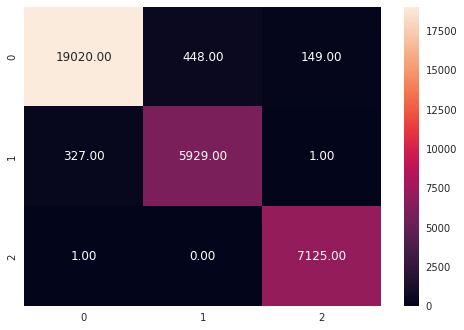

In [33]:
cm = confusion_matrix(ytest, ypredicted)
cm
print(sb.heatmap(cm,annot=True,fmt=".2f"))

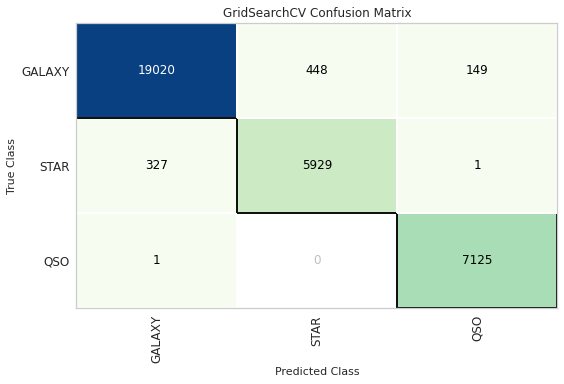

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
rfcm = ConfusionMatrix(rfc_grid_search, classes=['GALAXY','STAR','QSO'], cmap='GnBu')

rfcm.fit(xtrain_smote, ytrain_smote)
rfcm.score(xtest, ytest)
rfcm.show()

# K-Nearest Neighbor (KNN)

In [35]:
%%time
knn = KNeighborsClassifier()
# train grid search
params = {'n_neighbors':[5,10]} 
knn_grid_search = GridSearchCV(estimator = knn, param_grid = params, cv = kfold, n_jobs=-1, verbose=2, return_train_score=True)
start = time.time()
clf=knn_grid_search.fit(xtrain_smote, ytrain_smote)
end = time.time()

Fitting 10 folds for each of 2 candidates, totalling 20 fits
CPU times: user 527 ms, sys: 48 ms, total: 575 ms
Wall time: 2min 15s


In [36]:
print("[INFO] grid search took {:.2f} seconds".format(end - start))
print('Best Score: %.4f' % (knn_grid_search.best_score_))
print('Best Params: %s' % (knn_grid_search.best_params_))
print('Best Estimator: ') 
print(knn_grid_search.best_estimator_)
print(clf)

[INFO] grid search took 135.58 seconds
Best Score: 0.9612
Best Params: {'n_neighbors': 5}
Best Estimator: 
KNeighborsClassifier()
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10]}, return_train_score=True,
             verbose=2)


In [37]:
ypredicted=knn_grid_search.predict(xtest)
score = clf.score(xtest, ytest)  
knn_score = np.mean(score)
print('Test Accuracy : %.4f' % (knn_score))
print('Test KNN Accuracy : ' + " {:.2f}%".format(np.mean(score) * 100))

Test Accuracy : 0.9365
Test KNN Accuracy :  93.65%


In [38]:
print(classification_report(ytest,ypredicted))
print("KNN model accuracy_score on test:", accuracy_score(ytest, ypredicted))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     19617
           1       0.90      0.92      0.91      6257
           2       0.90      0.95      0.93      7126

    accuracy                           0.94     33000
   macro avg       0.92      0.94      0.93     33000
weighted avg       0.94      0.94      0.94     33000

KNN model accuracy_score on test: 0.9365151515151515


AxesSubplot(0.125,0.125;0.62x0.755)


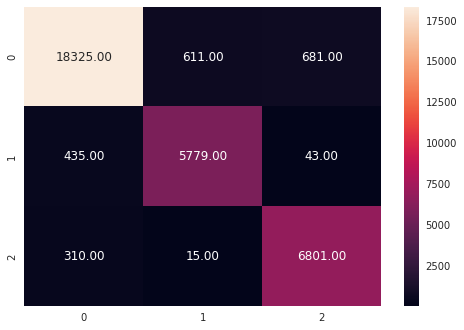

In [39]:
cm = confusion_matrix(ytest, ypredicted)
cm
print(sb.heatmap(cm,annot=True,fmt=".2f"))

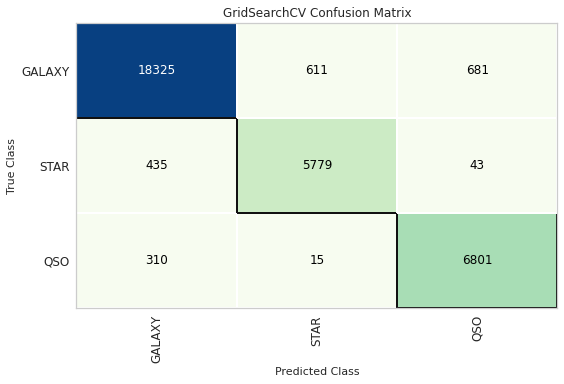

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [40]:
knncm = ConfusionMatrix(knn_grid_search, classes=['GALAXY','STAR','QSO'], cmap='GnBu')

knncm.fit(xtrain_smote, ytrain_smote)
knncm.score(xtest, ytest)
knncm.show()

# XGBoost

In [41]:
%%time
xgb = xgboost.XGBClassifier()
# train grid search
params = {'max_depth':[6,10], 'n_estimators':[10,100,150]}
xgb_grid_search = GridSearchCV(estimator = xgb, param_grid = params, cv = kfold, n_jobs=-1)
start = time.time()
clf=xgb_grid_search.fit(xtrain_smote, ytrain_smote)
end = time.time()

CPU times: user 6min 34s, sys: 779 ms, total: 6min 34s
Wall time: 42min 54s


In [42]:
print("[INFO] grid search took {:.2f} seconds".format(end - start))
print('Best Score: %.4f' % (xgb_grid_search.best_score_))
print('Best Params: %s' % (xgb_grid_search.best_params_))
print('Best Estimator: ') 
print(xgb_grid_search.best_estimator_)
print(clf)

[INFO] grid search took 2574.78 seconds
Best Score: 0.9851
Best Params: {'max_depth': 10, 'n_estimators': 150}
Best Estimator: 
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
             

In [43]:
ypredicted=xgb_grid_search.predict(xtest)
score = clf.score(xtest, ytest)  
print('Accuracy : %.4f' % (score))
xgb_score = np.mean(score)
print('Test Accuracy : %.4f' % (xgb_score))
print('Test XGBoost Accuracy : ' + " {:.2f}%".format(np.mean(score) * 100))

Accuracy : 0.9793
Test Accuracy : 0.9793
Test XGBoost Accuracy :  97.93%


In [44]:
print(classification_report(ytest, ypredicted))
print("XGBoost accuracy_score  on test:", accuracy_score(ytest, ypredicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19617
           1       0.95      0.95      0.95      6257
           2       1.00      1.00      1.00      7126

    accuracy                           0.98     33000
   macro avg       0.98      0.98      0.98     33000
weighted avg       0.98      0.98      0.98     33000

XGBoost accuracy_score  on test: 0.9792727272727273


AxesSubplot(0.125,0.125;0.62x0.755)


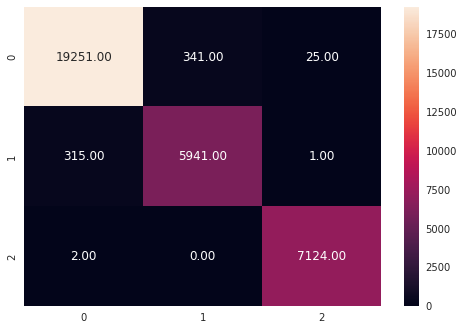

In [45]:
cm = confusion_matrix(ytest, ypredicted)
cm
print(sb.heatmap(cm,annot=True,fmt=".2f"))

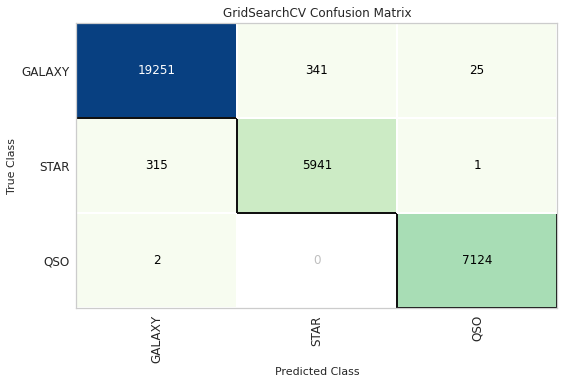

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [46]:
xgbcm = ConfusionMatrix(xgb_grid_search, classes=['GALAXY','STAR','QSO'], cmap='GnBu')

xgbcm.fit(xtrain_smote, ytrain_smote)
xgbcm.score(xtest, ytest)
xgbcm.show()

# BaggingClassifier

In [47]:
%%time
bag = BaggingClassifier(random_state = 42)
# train grid search
params = {'n_estimators':[10,100,150]}
bag_grid_search = GridSearchCV(estimator = bag, param_grid = params, cv = kfold, n_jobs=-1)
start = time.time()
clf=bag_grid_search.fit(xtrain_smote, ytrain_smote)
end = time.time()

[CV] END ......................................n_neighbors=5; total time=   2.9s
[CV] END ......................................n_neighbors=5; total time=   3.1s
[CV] END .....................................n_neighbors=10; total time=   3.6s
[CV] END .....................................n_neighbors=10; total time=   3.5s
[CV] END .....................................n_neighbors=10; total time=   3.7s
[CV] END ......................................n_neighbors=5; total time=   2.9s
[CV] END ......................................n_neighbors=5; total time=   2.8s
[CV] END ......................................n_neighbors=5; total time=   2.9s
[CV] END .....................................n_neighbors=10; total time=   3.6s
[CV] END .....................................n_neighbors=10; total time=   4.1s
CPU times: user 4min 29s, sys: 203 ms, total: 4min 29s
Wall time: 30min 44s


In [48]:
print("[INFO] grid search took {:.2f} seconds".format(end - start))
print('Best Score: %.4f' % (bag_grid_search.best_score_))
print('Best Params: %s' % (bag_grid_search.best_params_))
print('Best Estimator: ') 
print(bag_grid_search.best_estimator_)
print(clf)

[INFO] grid search took 1844.80 seconds
Best Score: 0.9821
Best Params: {'n_estimators': 150}
Best Estimator: 
BaggingClassifier(n_estimators=150, random_state=42)
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=BaggingClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 150]})


In [49]:
ypredicted=bag_grid_search.predict(xtest)
score = clf.score(xtest, ytest)  
print('Accuracy : %.4f' % (score))
bag_score = np.mean(score)
print('Test Accuracy : %.4f' % (bag_score))
print('Test Bagging Accuracy : ' + " {:.2f}%".format(np.mean(score) * 100))

Accuracy : 0.9780
Test Accuracy : 0.9780
Test Bagging Accuracy :  97.80%


In [50]:
print(classification_report(ytest, ypredicted))
print("Bagging accuracy_score  on test:", accuracy_score(ytest, ypredicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19617
           1       0.94      0.95      0.95      6257
           2       1.00      1.00      1.00      7126

    accuracy                           0.98     33000
   macro avg       0.97      0.98      0.97     33000
weighted avg       0.98      0.98      0.98     33000

Bagging accuracy_score  on test: 0.978


AxesSubplot(0.125,0.125;0.62x0.755)


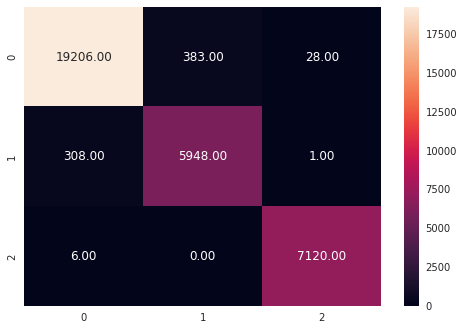

In [51]:
cm = confusion_matrix(ytest, ypredicted)
cm
print(sb.heatmap(cm,annot=True,fmt=".2f"))

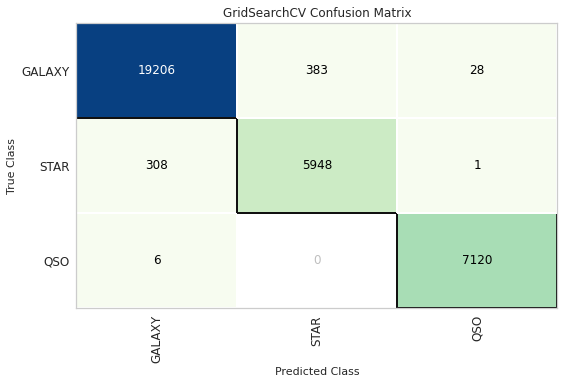

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
bagcm = ConfusionMatrix(bag_grid_search, classes=['GALAXY','STAR','QSO'], cmap='GnBu')

bagcm.fit(xtrain_smote, ytrain_smote)
bagcm.score(xtest, ytest)
bagcm.show()

[CV] END ......................................n_neighbors=5; total time=   2.9s
[CV] END ......................................n_neighbors=5; total time=   2.9s
[CV] END ......................................n_neighbors=5; total time=   2.9s
[CV] END .....................................n_neighbors=10; total time=   3.8s
[CV] END .....................................n_neighbors=10; total time=   4.0s


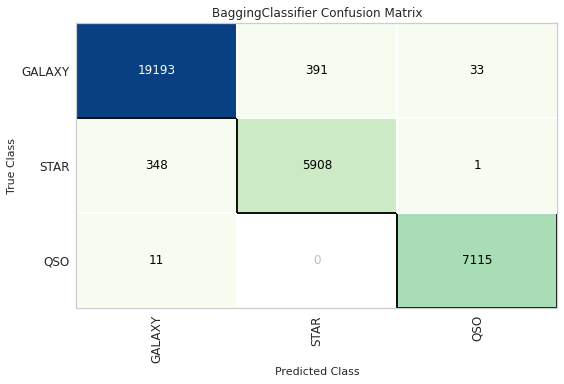

<AxesSubplot:title={'center':'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:
bagcm = ConfusionMatrix(bag, classes=['GALAXY','STAR','QSO'], cmap='GnBu')

bagcm.fit(xtrain_smote, ytrain_smote)
bagcm.score(xtest, ytest)
bagcm.show()

# Stacking of KNN+SVM+RF

# Voting of KNN+SVM+RF

In [54]:
%%time
# create the sub models
estimators = []
model1 = SVC(kernel='rbf', C=10, gamma=1) 
# -----?? SVM olacak ama nasıl??
estimators.append(('svc', model1))
model2 = RandomForestClassifier(n_estimators=100, max_depth=10)
estimators.append(('rfc', model2))
model3 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('knn', model3))
# create the ensemble model
voting = VotingClassifier(estimators,voting ='hard')
start = time.time()
results = cross_val_score(voting, xtrain_smote, ytrain_smote, cv=kfold,n_jobs=-1)
end = time.time()

[CV] END ......................................n_neighbors=5; total time=   3.0s
[CV] END ......................................n_neighbors=5; total time=   2.9s
[CV] END .....................................n_neighbors=10; total time=   3.5s
[CV] END .....................................n_neighbors=10; total time=   3.7s
[CV] END .....................................n_neighbors=10; total time=   3.9s
CPU times: user 364 ms, sys: 240 ms, total: 605 ms
Wall time: 28min 27s


In [55]:
print(results)
voting_score = np.mean(results)
print('Accuracy : %.4f' % (voting_score))

[0.97589756 0.97681814 0.97614863 0.97573019 0.97514228 0.97522598
 0.97254771 0.97874121 0.97397054 0.97455641]
Accuracy : 0.9755


In [56]:
%%time
# train grid search
params = {'svc__C': [10], 'svc__gamma': [1], 'svc__kernel': ['rbf'], 'rfc__n_estimators': [100], 'rfc__max_depth':[10], 'knn__n_neighbors':[5]}
vote_grid_search = GridSearchCV(estimator = voting, param_grid = params, cv = kfold, n_jobs=-1)
start = time.time()
clf=vote_grid_search.fit(xtrain_smote, ytrain_smote)
end = time.time()

CPU times: user 9min 5s, sys: 696 ms, total: 9min 6s
Wall time: 38min 16s


In [57]:
print("[INFO] grid search took {:.2f} seconds".format(end - start))
print('Best Score: %.4f' % (vote_grid_search.best_score_))
print('Best Params: %s' % (vote_grid_search.best_params_))
print('Best Estimator: ') 
print(vote_grid_search.best_estimator_)
print(clf)

[INFO] grid search took 2296.03 seconds
Best Score: 0.9753
Best Params: {'knn__n_neighbors': 5, 'rfc__max_depth': 10, 'rfc__n_estimators': 100, 'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Best Estimator: 
VotingClassifier(estimators=[('svc', SVC(C=10, gamma=1)),
                             ('rfc', RandomForestClassifier(max_depth=10)),
                             ('knn', KNeighborsClassifier())])
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=VotingClassifier(estimators=[('svc', SVC(C=10, gamma=1)),
                                                    ('rfc',
                                                     RandomForestClassifier(max_depth=10)),
                                                    ('knn',
                                                     KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [5], 'rfc__max_depth': [10],
                         'rfc__n_estimato

In [58]:
ypredicted_voting = vote_grid_search.predict(xtest)
score = clf.score(xtest, ytest)
print('Accuracy : %.4f' % (score))
voting_score = np.mean(score)
print('Accuracy : %.4f' % (voting_score))
print('Test Voting Accuracy : ' + " {:.2f}%".format(np.mean(score) * 100))

Accuracy : 0.9693
Accuracy : 0.9693
Test Voting Accuracy :  96.93%


In [59]:
print(classification_report(ytest, ypredicted_voting))
print("Voting accuracy_score  on test:", accuracy_score(ytest, ypredicted_voting))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     19617
           1       0.94      0.94      0.94      6257
           2       0.96      1.00      0.98      7126

    accuracy                           0.97     33000
   macro avg       0.96      0.97      0.97     33000
weighted avg       0.97      0.97      0.97     33000

Voting accuracy_score  on test: 0.9692727272727273


AxesSubplot(0.125,0.125;0.62x0.755)


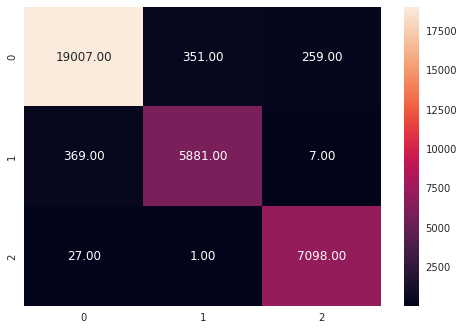

In [60]:
cm = confusion_matrix(ytest, ypredicted_voting)
cm
print(sb.heatmap(cm,annot=True,fmt=".2f"))

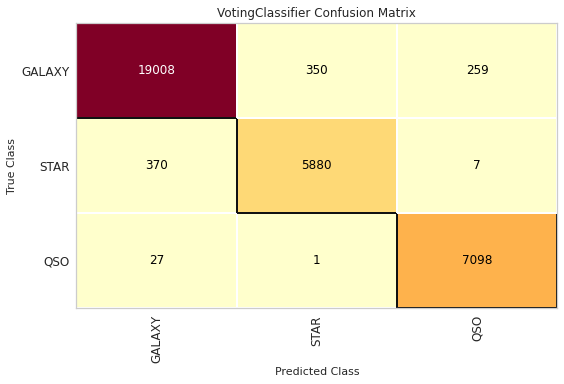

CPU times: user 9min 43s, sys: 638 ms, total: 9min 44s
Wall time: 9min 44s


<AxesSubplot:title={'center':'VotingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [61]:
%%time
ENSM_cm = ConfusionMatrix(voting, classes=['GALAXY','STAR','QSO'], cmap='YlOrRd')
ENSM_cm.fit(xtrain_smote, ytrain_smote)
ENSM_cm.score(xtest, ytest)
ENSM_cm.show()

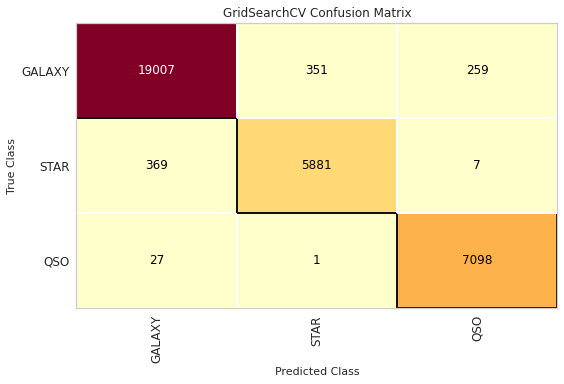

CPU times: user 1min 3s, sys: 198 ms, total: 1min 3s
Wall time: 1min 3s


<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
%%time
ENSM_cm = ConfusionMatrix(clf, classes=['GALAXY','STAR','QSO'], cmap='YlOrRd')
ENSM_cm.fit(xtrain_smote, ytrain_smote)
ENSM_cm.score(xtest, ytest)
ENSM_cm.show()

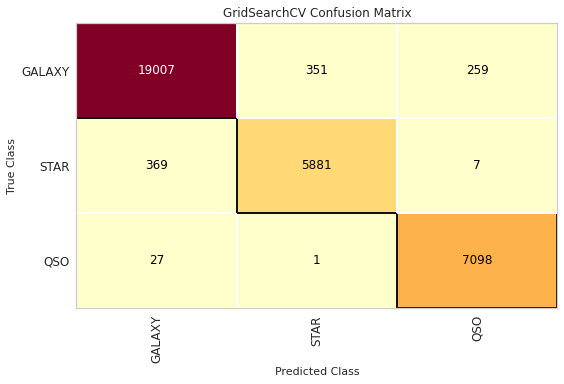

CPU times: user 1min 3s, sys: 205 ms, total: 1min 3s
Wall time: 1min 3s


<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [63]:
%%time
ENSM_cm = ConfusionMatrix(vote_grid_search, classes=['GALAXY','STAR','QSO'], cmap='YlOrRd')
ENSM_cm.fit(xtrain_smote, ytrain_smote)
ENSM_cm.score(xtest, ytest)
ENSM_cm.show()

# Models That Will Be Trained With Grid Search Later

In [64]:
%%time
model = LGBMClassifier()
params = {'max_depth':[5,10], 'n_estimators':[10,100,150]} 
score = cross_val_score(model , x , y ,cv=kfold)
print('Light GradientBoostingClassifier : ' + " {:.2f}%".format(np.mean(score) * 100))

Light GradientBoostingClassifier :  97.89%
CPU times: user 1min 14s, sys: 646 ms, total: 1min 14s
Wall time: 19.1 s


In [65]:
%%time
model = CatBoostClassifier(verbose  = 0)
score = cross_val_score(model, x, y, cv = kfold)
print('CatBoostClassifier : ' + " {:.2f}%".format(np.mean(score) * 100))

CatBoostClassifier :  97.89%
CPU times: user 18min 34s, sys: 32.1 s, total: 19min 6s
Wall time: 5min 8s


# FURTHER WORK
* Use cross_validate function with grid search, implement nested cross validation
* Use cross validation at last step to compare different algorithms. (So you need to use pipeline to do that.) 
* Use pipeline
* Fully implement models in the 'Models That Will Be Trained With Grid Search Later' section with GridSearchCV. https://www.kaggle.com/code/sfktrkl/titanic-hyperparameter-tuning-gridsearchcv?scriptVersionId=82294857&cellId=69 
* Learning curve